## Financial Wellbeing Score development

1. Number of months in the last year with payment dishonours (missed payments on credit cards etc -- how will this be represented in transaction data? Bank fees and charges?)


2. Any payday loans in the last year? (include BNPL)

3. Days in the last year with liquid balances below one week's average expenses - bank balance on any given day that is less than expected outgoings for that week. (reported as % of days)

4. Days in the last year during which customer had the ability to raise one month's expenses from savings or available credit

5. Age normed percentile of customer's median savings balance over the last year

In [159]:
import pandas as pd
import pickle
import numpy as np
import extract_time
import scores
import scores_vis
import f_wellbeing
from datetime import date

import importlib
importlib.reload(scores)
importlib.reload(extract_time)
importlib.reload(scores_vis)
importlib.reload(f_wellbeing)

<module 'f_wellbeing' from '/Users/ellie/Documents/Projects/user_scores/f_wellbeing.py'>

In [160]:
with open('/Users/ellie/Documents/Projects/Models_Data/RawData/OBdata/test_df_05042022.pkl','rb') as f:
    data = pickle.load(f)

In [161]:
def label_bnpl(df:pd.DataFrame):

    bnpl_list=['KLARNA','CLEARPAY','MY ARGOS CARD','LAYBUY','OPENPAY','PAYL8R','OPENPAY','SPLITIT','DIVIDEBUY','ZILCH','POLLENPAY','PYPL PAYIN']

    bnpl=[]
    for description in df.description:
        res = [element for element in bnpl_list if (element in description)]
        if res == True:
            print(res)
        bnpl.append(res)
    df['bnpl']=bnpl
    df.bnpl = df.bnpl.apply(lambda x:str(x).strip("[]"))

    df.assign(bnpl_scores=0)
    df.loc[df.bnpl!='','bnpl_scores']=1

    return df

In [162]:
data = label_bnpl(data)

In [164]:
readiness = scores.score_profile(data)

/opt/anaconda3/envs/chat_env/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
/opt/anaconda3/envs/chat_env/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
/opt/anaconda3/envs/chat_env/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future vers

In [165]:
readiness

{'timestamp': '19-Apr-2022',
 'income': 638,
 'outgoings': 676,
 'budgeting score': 82,
 'affordability': 67,
 'preparedness': 8,
 'bnpl count': 0,
 'observed wellbeing': 20.0}

RangeIndex(start=0, stop=13, step=1)
Average essential outgoings for past 4 weeks: 160


/opt/anaconda3/envs/chat_env/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


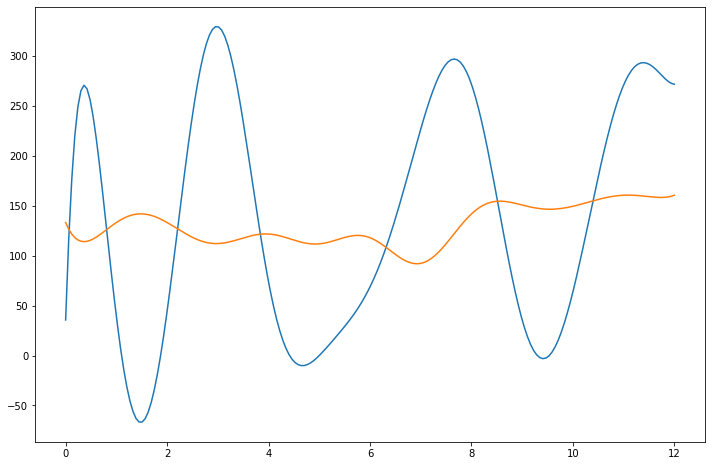

In [33]:
scores_vis.weekly_score_smooth(scores.weekly_score(data,'essential outgoings'),'essential outgoings')

In [32]:
df = data[(data.need_want=='Essential')|((data.transaction_class=='Loans&Credit')&(data.type=='DEBIT'))][['timestamp','amount']]
df.timestamp=df.timestamp.apply(lambda x:pd.Timestamp(x))
df.amount=0-(df.amount)
df['month']=df.timestamp.dt.month_name()
df.groupby('month')['amount'].sum()

month
December    143.52
February    664.70
January     664.70
March       521.18
Name: amount, dtype: float64